# Import All Dependencies

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Data collection and Analysis 

In [2]:
# load the dataset  
mart_data = pd.read_csv("data.csv")

In [3]:
mart_data.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train


In [4]:
mart_data.shape

(14204, 13)

In [5]:
mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [6]:
mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Data Preprocessing 

In [7]:
categorical_data = mart_data.select_dtypes(include="object") 
numerical_data = mart_data.select_dtypes(include="float64")

In [8]:
categorical_data

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,train
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train
...,...,...,...,...,...,...,...,...
14199,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1,test
14200,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2,test
14201,NCO17,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1,test
14202,FDJ26,Regular,Canned,OUT017,NaN,Tier 2,Supermarket Type1,test


In [9]:
# handle missing value  
# Mean --> average 
# Median --> Most repeated value 
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [10]:
mart_data["Item_Weight"].mean()

12.792854228644284

In [11]:
# filling with the Mean value 
mart_data["Item_Weight"].fillna(mart_data["Item_Weight"].mean(), inplace=True)

In [12]:
# Replacing the missing value in "Outlet_Size" with --> Mode 
# .pivot_table(...) → This creates a pivot table, which is a way to summarize data by applying an aggregation function.
mode_of_Outlet_Size = mart_data.pivot_table(values="Outlet_Size", columns="Outlet_Type", aggfunc={lambda x:x.mode()[0]})

In [13]:
mode_of_Outlet_Size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
<lambda>,Small,Small,Medium,Medium


In [14]:
missing_values = mart_data["Outlet_Size"].isnull()

In [15]:
missing_values

0        False
1        False
2        False
3         True
4        False
         ...  
14199    False
14200    False
14201     True
14202     True
14203     True
Name: Outlet_Size, Length: 14204, dtype: bool

In [16]:
mart_data.loc[missing_values, "Outlet_Size"] = mart_data.loc[missing_values, "Outlet_Size"].apply(lambda x: mode_of_Outlet_Size)

In [17]:
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [18]:
print(mart_data[mart_data["Item_Outlet_Sales"].isna()]["source"].value_counts())

source
test    5681
Name: count, dtype: int64


In [19]:
mart_data["Item_Outlet_Sales"].fillna(mart_data["Item_Outlet_Sales"].median(), inplace=True)

In [20]:
mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

# Data Analysis

In [21]:
mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2026.522094
std,4.234226,0.051459,62.086938,8.371664,1335.388924
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,1468.089000
50%,12.792854,0.054021,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [22]:
sns.set()

<Figure size 600x600 with 0 Axes>

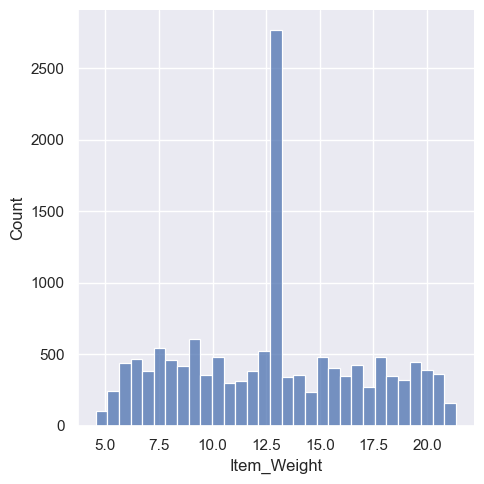

In [23]:
# item_weight distribution 
plt.figure(figsize=(6,6))
sns.displot(mart_data["Item_Weight"])
plt.show()

<Figure size 600x600 with 0 Axes>

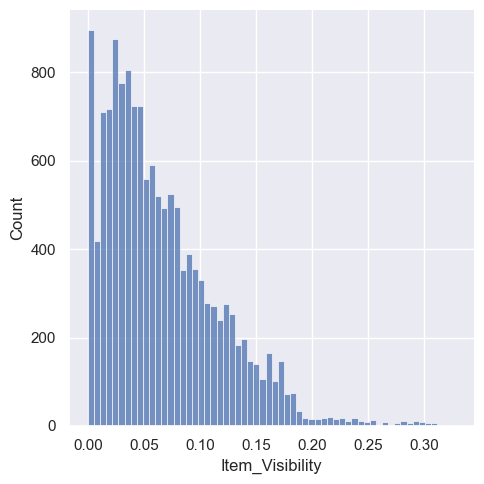

In [24]:
plt.figure(figsize=(6,6))
sns.displot(mart_data["Item_Visibility"])
plt.show()

<Figure size 600x600 with 0 Axes>

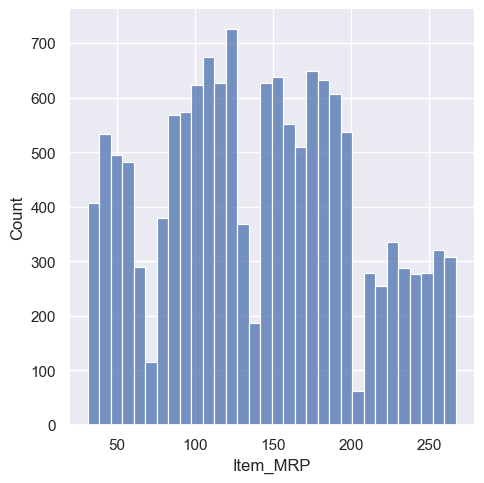

In [25]:
# Item_MRP distribution 
plt.figure(figsize=(6,6))
sns.displot(mart_data["Item_MRP"])
plt.show()

<Figure size 600x600 with 0 Axes>

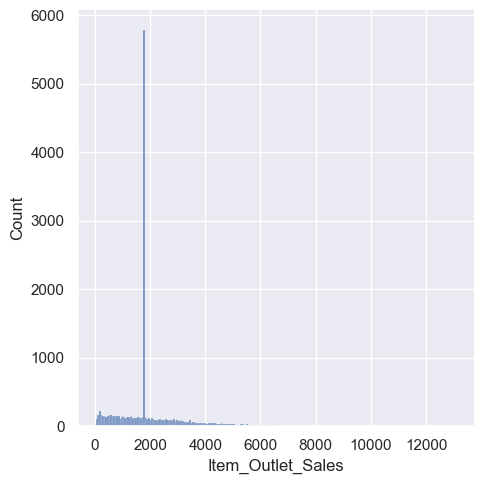

In [26]:
# Item_Outlet_Sales distribution 
plt.figure(figsize=(6,6))
sns.displot(mart_data["Item_Outlet_Sales"])
plt.show()

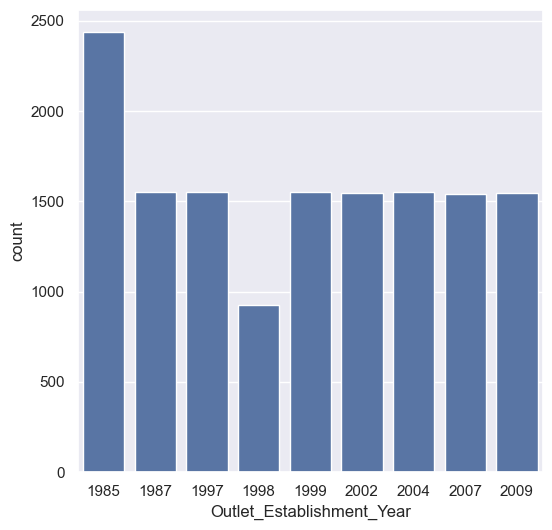

In [27]:
# Item_MRP distribution 
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Establishment_Year", data = mart_data)
plt.show()

# categorical colums 

In [28]:
categorical_data.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train


In [29]:
categorical_data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')

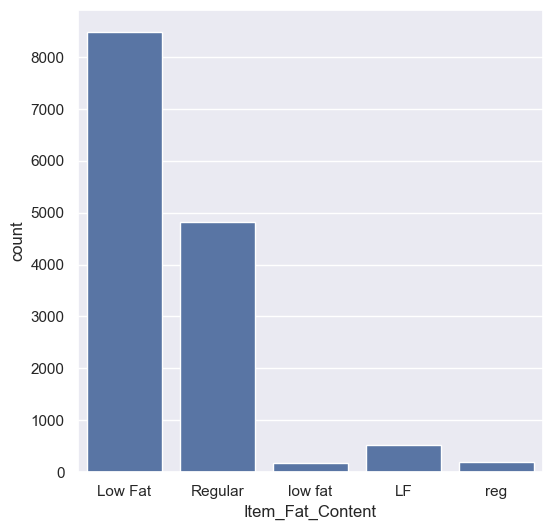

In [30]:
# Item_Fat_Content distribution 
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content", data = mart_data)
plt.show()

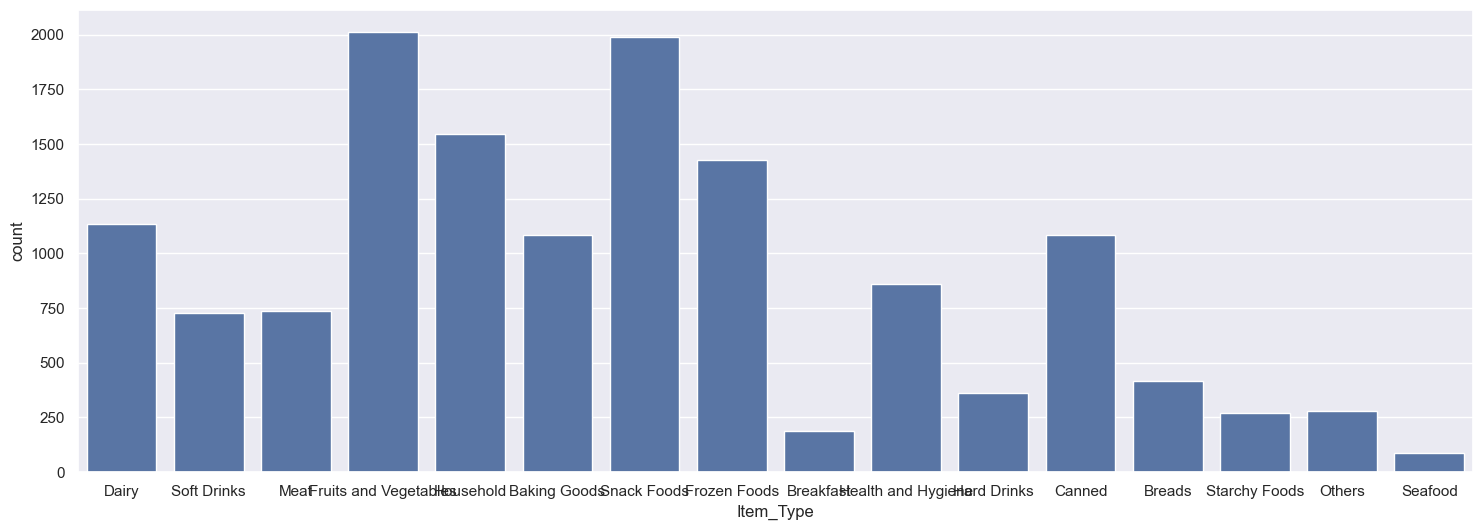

In [31]:
# Item_Type distribution 
plt.figure(figsize=(18,6))
sns.countplot(x="Item_Type", data = mart_data)
plt.show()

In [32]:
mart_data["Outlet_Size"].fillna("Unknown", inplace=True)


In [33]:
mart_data["Outlet_Size"] = mart_data["Outlet_Size"].astype(str)

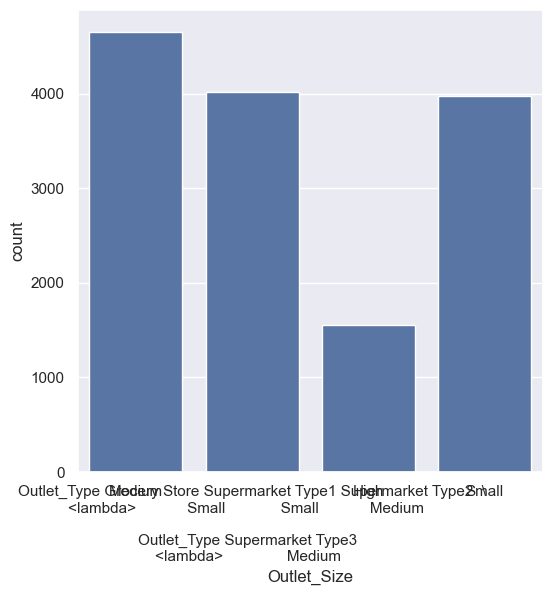

In [34]:
# Item_Fat_Content distribution 
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Size", data=mart_data)
plt.show()

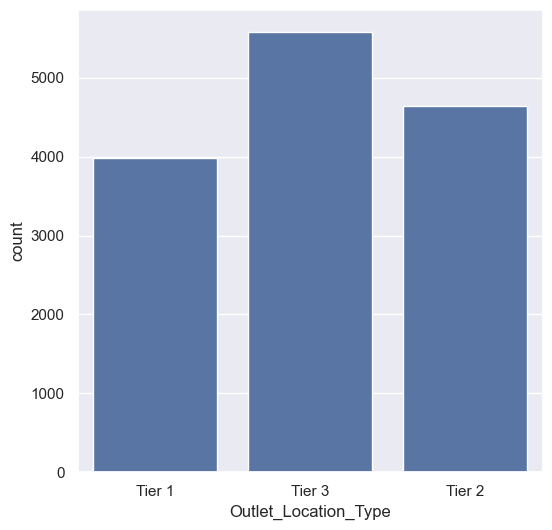

In [35]:
#  Outlet_Location_Type 
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Location_Type", data=mart_data)
plt.show()

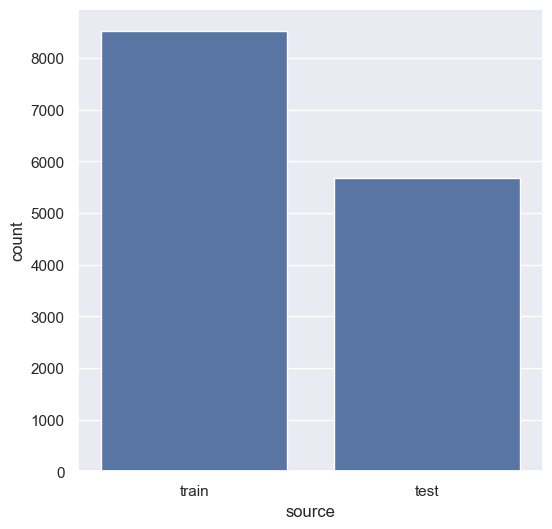

In [36]:
# source 
plt.figure(figsize=(6,6))
sns.countplot(x="source", data=mart_data)
plt.show()

In [37]:
categorical_data.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train


In [38]:
mart_data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [39]:
mart_data["Item_Fat_Content"].replace({
    "LF": "Low Fat", 
    "low fat": "Low Fat",
    "reg": "Regular"
}, inplace=True)

In [40]:
mart_data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [41]:
# Initialize Label Encoder
encoder = LabelEncoder()
 # fit transform the column
mart_data["Item_Fat_Content"] = encoder.fit_transform(mart_data["Item_Fat_Content"])
# do the other columns 
mart_data["Item_Type"] = encoder.fit_transform(mart_data["Item_Type"])

mart_data["Item_Identifier"] = encoder.fit_transform(mart_data["Item_Identifier"])

mart_data["Outlet_Identifier"] = encoder.fit_transform(mart_data["Outlet_Identifier"])

mart_data["Outlet_Size"] = encoder.fit_transform(mart_data["Outlet_Size"])

mart_data["Outlet_Location_Type"] = encoder.fit_transform(mart_data["Outlet_Location_Type"])

mart_data["Outlet_Type"] = encoder.fit_transform(mart_data["Outlet_Type"])

mart_data["source"] = encoder.fit_transform(mart_data["source"])


In [42]:
categorical_data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')

In [43]:
mart_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,1
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800,1
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,1


#  Splitting the Feature and Target 

In [44]:
x = mart_data.drop(columns=["Item_Outlet_Sales"])  # Features
y = mart_data["Item_Outlet_Sales"]  # Target variable

# Train Test Splitt 

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2 )

In [46]:
print(x.shape, x_train.shape, x_test.shape)

(14204, 12) (11363, 12) (2841, 12)


# Model Training 

# XGBoost 

In [47]:
xgb_model = XGBRFRegressor()

In [48]:
xgb_model.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [49]:
# Make a prediction of the model 
print(xgb_model.score(x_train, y_train)*100, xgb_model.score(x_test, y_test)*100)

61.55013938181557 60.36052457711114


In [50]:
# r2_score 
# train data prediction 
train_data_pred = xgb_model.predict(x_train)
# predction 
train_data_accuracy = r2_score(train_data_pred, y_train)
print("R Squared Error : ", train_data_accuracy)

R Squared Error :  0.3438399921581542


In [51]:
# r2_score 
# test data prediction 
test_data_pred = xgb_model.predict(x_test)
# predction 
test_data_accuracy = r2_score(test_data_pred, y_test)
print("R Squared Error : ", test_data_accuracy)

R Squared Error :  0.3503516417161454


# GradientBoostingRegressor 

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

# Train Model
gbr_model.fit(x_train, y_train)

# Prediction
y_train_pred = gbr_model.predict(x_train)
y_test_pred = gbr_model.predict(x_test)

# Evaluate Model
print("GBR R2 Score (Train):", r2_score(y_train, y_train_pred))
print("GBR R2 Score (Test):", r2_score(y_test, y_test_pred))


GBR R2 Score (Train): 0.6290433463785525
GBR R2 Score (Test): 0.5968501739257221


# Save the Model & Load 

In [53]:
import  joblib 
filename = "ali_trained_model.joblib"
joblib.dump(xgb_model, filename)

['ali_trained_model.joblib']

In [54]:
# Load the saved model
loaded_model = joblib.load(filename)  # Change "model_filename.pkl" to your actual file

# Make predictions
predictions = loaded_model.predict(x_test)

# Print predictions
print(predictions)


[1874.7903 2956.8826 1794.3359 ... 1794.3359 1963.6821 1734.7203]


In [55]:
joblib.dump(gbr_model, "ali_trained_model.joblib")

['ali_trained_model.joblib']

In [56]:
gbr_loaded_model = joblib.load("ali_trained_model.joblib")
# prediction 
gbr_prediction = gbr_loaded_model.predict(x_test)

In [57]:
print(gbr_prediction)

[1972.66745084 3121.20033512 1828.89102761 ... 1745.84632665 2154.05889795
 1740.6800253 ]
